https://becominghuman.ai/using-variational-autoencoder-vae-to-generate-new-images-14328877e88d

In [2]:
from google.colab import drive
drive.mount('/content/drive')

!pip install mat73
import mat73
from sklearn.model_selection import train_test_split
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf; tf.compat.v1.disable_eager_execution()
from keras import backend as K
from keras.layers import Input, Dense, Conv2D, Conv2DTranspose, Flatten, Lambda, Reshape
from tensorflow.keras import layers
from keras.models import Model
from keras.losses import binary_crossentropy, categorical_crossentropy, sparse_categorical_crossentropy
from keras.datasets import mnist
import math

np.random.seed(25)
tf.executing_eagerly()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


False

Pasta do canal 1 FP1-F7

In [3]:
# Lists all the files in a given repository
list_images = os.listdir("/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Channel1_64x82")#[:10]
dataset_list = []
# Reads each one of them
for image_name in list_images:

    image_path = "/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Channel1_64x82/" + image_name
    # Opens the image in Greyscale
    #image = scipy.io.loadmat(image_path)['All_nt2']
    image = mat73.loadmat(image_path)['All_nt2']
    #image = np.log(1+image) #log(1+image−image.min())  where 𝑚=min𝑘𝑥𝑘 ?#image / image.max()
    # std_dev = np.std(image)
    # mean = np.mean(image)
    # image = (image - mean) / std_dev
    # Saves the image into a list
    dataset_list.append(np.asarray(image).tolist())

# Creates an X array from the list
X1 = np.array(dataset_list)

# Creates an y array that consists of 1's to serve as the class label (1)
y1 = np.ones(len(dataset_list))

Pasta do canal 2

In [4]:
# Lists all the files in a given repository
list_images = os.listdir("/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Channel_T7-P7_64x64")#[:10]
dataset_list = []
# Reads each one of them
for image_name in list_images:

    image_path = "/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Channel_T7-P7_64x64/" + image_name
    # Opens the image in Greyscale
    #image = scipy.io.loadmat(image_path)['All_nt2']
    image = mat73.loadmat(image_path)['All_nt2']
    #image = np.log(1+image) #log(1+image−image.min())  where 𝑚=min𝑘𝑥𝑘 ?#image / image.max()
    # std_dev = np.std(image)
    # mean = np.mean(image)
    # image = (image - mean) / std_dev
    # Saves the image into a list
    dataset_list.append(np.asarray(image).tolist())

# Creates an X array from the list
X2 = np.array(dataset_list)
# Creates an y array that consists of 1's to serve as the class label (1)
y2 = np.ones(len(dataset_list))*2


Pasta do Canal 3

In [5]:
# Lists all the files in a given repository
list_images = os.listdir("/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Channel_F7-T7_64x64")#[:10]
dataset_list = []
# Reads each one of them
for image_name in list_images:

    image_path = "/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Channel_F7-T7_64x64/" + image_name
    # Opens the image in Greyscale
    #image = scipy.io.loadmat(image_path)['All_nt2']
    image = mat73.loadmat(image_path)['All_nt2']
    #image = np.log(1+image) #log(1+image−image.min())  where 𝑚=min𝑘𝑥𝑘 ?#image / image.max()
    # std_dev = np.std(image)
    # mean = np.mean(image)
    # image = (image - mean) / std_dev
    # Saves the image into a list
    dataset_list.append(np.asarray(image).tolist())

# Creates an X array from the list
X3 = np.array(dataset_list)
# Creates an y array that consists of 1's to serve as the class label (1)
y3 = np.ones(len(dataset_list))*3

Une os 3

161433400.96995756
0.0
18.899603243875344
0.0
1.0
0.0
Shape of X_train:  (1643, 64, 64)
Shape of y_train:  (1643,)
Shape of X_test:  (411, 64, 64)
Shape of y_test:  (411,)


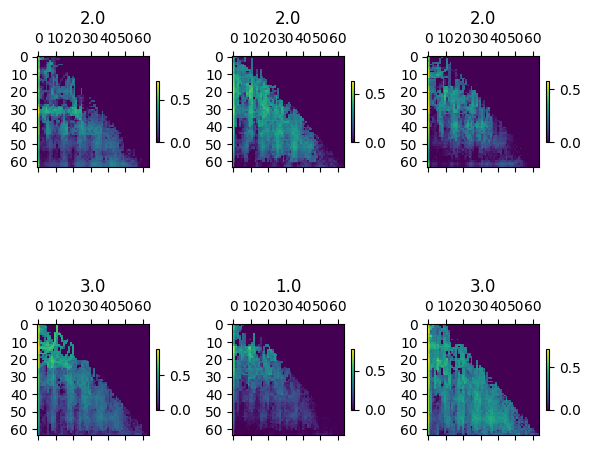

(1643, 64, 64, 1)


In [6]:
size = image.shape[0] * image.shape[1]

X = np.concatenate([X1, X2, X3])
y = np.concatenate([y1, y2, y3])
print(X.max())
print(X.min())

X = np.log(1+X) #log(1+image−image.min())
print(X.max())
print(X.min())
X = X/X.max()
print(X.max())
print(X.min())
# Splits the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.2, random_state=42)

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Display images of the first 9 digits in the training set and their true lables
fig, axs = plt.subplots(2, 3, sharey=False, tight_layout=True, figsize=(6,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,3):
        cax = axs[i,j].matshow(X_train[n])
        fig.colorbar(cax, shrink = 0.2)
        axs[i,j].set(title=y_train[n])
        n=n+1
plt.show()

# Convert from (no_of_data, 28, 28) to (no_of_data, 28, 28, 1)
X_train_new = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test_new = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

print(X_train_new.shape)
# Defining some variables
img_height   = X_train_new.shape[1]    # 28
img_width    = X_train_new.shape[2]    # 28
num_channels = X_train_new.shape[3]    # 1
input_shape =  (img_height, img_width, num_channels)   # (28,28,1)
latent_dim = 2    # Dimension of the latent space

In [7]:
# A function to compute the value of latent space
def compute_latent(x):
    mu, sigma = x
    batch = K.shape(mu)[0]
    dim = K.int_shape(mu)[1]
    eps = K.random_normal(shape=(batch,dim))
    return mu + K.exp(sigma/2)*eps

# The loss function for VAE
def kl_reconstruction_loss(true, pred):
    # Reconstruction loss (binary crossentropy)
    reconstruction_loss = binary_crossentropy(K.flatten(true), K.flatten(pred)) * img_width * img_height

    # KL divergence loss
    kl_loss = 1 + sigma - K.square(mu) - K.exp(sigma)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    # Total loss = 50% rec + 50% KL divergence loss
    return K.mean(reconstruction_loss + kl_loss)

# A function to display image sequence
def display_image_sequence(x_start, y_start, x_end, y_end, no_of_imgs):
    x_axis = np.linspace(x_start,x_end,no_of_imgs)
    y_axis = np.linspace(y_start,y_end,no_of_imgs)

    x_axis = x_axis[:, np.newaxis]
    y_axis = y_axis[:, np.newaxis]

    new_points = np.hstack((x_axis, y_axis))
    new_images = decoder.predict(new_points)
    new_images = new_images.reshape(new_images.shape[0], new_images.shape[1], new_images.shape[2])
    import scipy.io
    scipy.io.savemat('/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/vae_funcionandoLocal.mat', {"new_images":new_images})

    # Display some images
    fig, axes = plt.subplots(ncols=no_of_imgs, sharex=False,
                             sharey=True, figsize=(20, 7))
    counter = 0
    for i in range(no_of_imgs):
        axes[counter].imshow(new_images[i], cmap='gray')
        axes[counter].get_xaxis().set_visible(False)
        axes[counter].get_yaxis().set_visible(False)
        counter += 1
    plt.show()


In [8]:
# Constructing encoder
encoder_input = Input(shape=input_shape)

encoder_conv = layers.Conv2D(32, 2, activation="relu", strides= 2, padding="same")(encoder_input)
encoder_conv = layers.BatchNormalization()(encoder_conv)
encoder_conv = layers.ReLU()(encoder_conv)

encoder_conv = layers.Conv2D(64, 2, activation="relu",  strides= 2, padding="same")(encoder_conv)
encoder_conv = layers.BatchNormalization()(encoder_conv)
encoder_conv = layers.ReLU()(encoder_conv)
encoder_conv = layers.Dropout(0.25)(encoder_conv)

encoder_conv = layers.Conv2D(128, 2, activation="relu",  strides= 2, padding="same")(encoder_conv)
encoder_conv = layers.BatchNormalization()(encoder_conv)
encoder_conv = layers.ReLU()(encoder_conv)
encoder_conv = layers.Dropout(0.25)(encoder_conv)

encoder_conv = layers.Conv2D(256, 2, activation="relu",  strides= 2, padding="same")(encoder_conv)
encoder_conv = layers.BatchNormalization()(encoder_conv)
encoder_conv = layers.ReLU()(encoder_conv)

encoder_conv = layers.Conv2D(512, 2, activation="relu",  strides= 2, padding="same")(encoder_conv)
encoder_conv = layers.BatchNormalization()(encoder_conv)
encoder_conv = layers.ReLU()(encoder_conv)

encoder = layers.Flatten()(encoder_conv)
encoder = layers.BatchNormalization()(encoder)
encoder = layers.Dense(2048, activation="relu")(encoder)
encoder = layers.Dropout(0.25)(encoder)
encoder = layers.Dense(512, activation="relu")(encoder)
encoder = layers.Dropout(0.25)(encoder)
encoder = layers.Dense(256, activation="relu")(encoder)
encoder = layers.Dropout(0.25)(encoder)
encoder = layers.Dense(128, activation="relu")(encoder)
encoder = layers.Dropout(0.25)(encoder)
encoder = layers.Dense(3, activation="relu")(encoder)
encoder = layers.BatchNormalization()(encoder)

mu = Dense(latent_dim)(encoder)
sigma = Dense(latent_dim)(encoder)

latent_space = Lambda(compute_latent, output_shape=(latent_dim,))([mu, sigma])

# Take the convolution shape to be used in the decoder
conv_shape = K.int_shape(encoder_conv)

# Constructing decoder
decoder_input = Input(shape=(latent_dim,))
decoder = Dense(conv_shape[1]*conv_shape[2]*conv_shape[3], activation='relu')(decoder_input)
decoder = layers.BatchNormalization()(decoder)
decoder = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(decoder)

decoder_conv = layers.Conv2DTranspose(512, 2, activation="relu", strides= 2, padding="same")(decoder)
decoder_conv = layers.BatchNormalization()(decoder_conv)
decoder_conv = layers.ReLU()(decoder_conv)
decoder_conv = layers.Dropout(0.25)(decoder_conv)

decoder_conv = layers.Conv2DTranspose(256, 2, activation="relu", strides= 2, padding="same")(decoder_conv)
decoder_conv = layers.BatchNormalization()(decoder_conv)
decoder_conv = layers.ReLU()(decoder_conv)
decoder_conv = layers.Dropout(0.25)(decoder_conv)

decoder_conv = layers.Conv2DTranspose(128, 2, activation="relu", strides= 2, padding="same")(decoder_conv)
decoder_conv = layers.BatchNormalization()(decoder_conv)
decoder_conv = layers.ReLU()(decoder_conv)
decoder_conv = layers.Dropout(0.25)(decoder_conv)

decoder_conv = layers.Conv2DTranspose(64, 2, activation="relu", strides= 2, padding="same")(decoder_conv)
decoder_conv = layers.BatchNormalization()(decoder_conv)
decoder_conv = layers.ReLU()(decoder_conv)
decoder_conv = layers.Dropout(0.25)(decoder_conv)

decoder_conv = layers.Conv2DTranspose(32, 2, activation="relu", strides= 2, padding="same")(decoder_conv)
decoder_conv = layers.BatchNormalization()(decoder_conv)
decoder_conv = layers.ReLU()(decoder_conv)

decoder_conv = layers.Conv2DTranspose(filters=num_channels, kernel_size=2, padding='same', activation='sigmoid')(decoder_conv)

# Actually build encoder, decoder and the entire VAE
encoder = Model(encoder_input, latent_space)
encoder.summary()
decoder = Model(decoder_input, decoder_conv)
decoder.summary()
vae = Model(encoder_input, decoder(encoder(encoder_input)))
# vae.summary()
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

e_s = EarlyStopping(monitor='val_loss', patience=50)
m_c = ModelCheckpoint(r'/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/vae_funcionando.hdf5', save_weights_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=10)

opt = tf.keras.optimizers.legacy.Adam()
vae.compile(optimizer=opt, loss=kl_reconstruction_loss)

# Training VAE
history = vae.fit(x=X_train_new, y=X_train_new, epochs=500, batch_size=128, validation_split=0.1,#validation_data=(X_test_new,X_test_new),
                  shuffle=True, callbacks=[e_s, m_c, reduce_lr])

# Plotting loss value decrease
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.savefig('/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/vae_funcionando_hist.png')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/vae_funcionando_hist.pdf')
plt.show()

# Transform images to points in latent space using encoder
encoded = encoder.predict(X_test_new)

# Displaying images in latent space
plt.figure(figsize=(8,8))
plt.scatter(encoded[:,0], encoded[:,1], s=2, c=y_test, cmap='jet')
plt.colorbar()
plt.grid()

plt.savefig('/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/vae_funcionando_latentSpace_Test.png')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/vae_funcionando_latentSpace_Test.pdf')
plt.show()

encoded = encoder.predict(X_train_new)

# Displaying images in latent space
plt.figure(figsize=(8,8))
plt.scatter(encoded[:,0], encoded[:,1], s=2, c=y_train, cmap='jet')
plt.colorbar()
plt.grid()

plt.savefig('/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/vae_funcionando_latentSpace_Train.png')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/vae_funcionando_latentSpace_Train.pdf')
plt.show()

Instructions for updating:
Colocations handled automatically by placer.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 32)   160         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 re_lu (ReLU)                   (None, 32, 32, 32)   0           ['batch_normalization[0][0]']

KeyboardInterrupt: ignored

In [ ]:

# Displaying images in latent space
plt.figure()
plt.scatter(encoded[:,0], encoded[:,1], s=2, c=y_train, cmap='jet')
plt.colorbar()
plt.grid()
plt.show()